**Libraries**
-

In [ ]:
import sys
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# importar funciones del torneo
from tournament import run_tournament, play_game, column_usage
from MyPolicy import MyPolicy
from RandomPolicy import RandomPolicy
from DeterministicPolicy import DeterministicPolicy

sns.set(style="whitegrid")


# **1. Correr el Algoritmo**

In [2]:
games = 100

results = run_tournament(MyPolicy, RandomPolicy, games)

wins = results["A"]
losses = results["B"]
draws = results["draw"]

results

{'A': 89, 'B': 7, 'draw': 4}

# **2. Barplot Rendimiento**

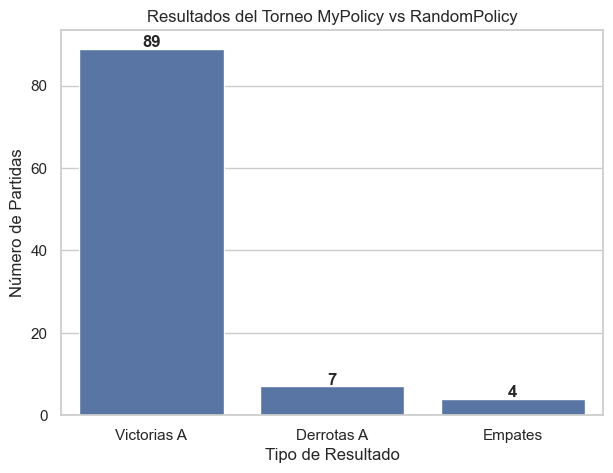

In [6]:

# Crear DataFrame para seaborn
df = pd.DataFrame({
    "Resultado": ["Victorias A", "Derrotas A", "Empates"],
    "Cantidad": [wins, losses, draws]
})

# --- Gráfico ---
sns.set(style="whitegrid")
plt.figure(figsize=(7,5))
ax = sns.barplot(data=df, x="Resultado", y="Cantidad")

plt.title("Resultados del Torneo MyPolicy vs RandomPolicy")
plt.ylabel("Número de Partidas")
plt.xlabel("Tipo de Resultado")

for i, v in enumerate(df["Cantidad"]):
    ax.text(i, v + 0.5, str(v), ha='center', fontweight='bold')

plt.show()

# **3. Winrate Acumulado**

In [ ]:
import numpy as np

def run_and_track(MyPol, OppPol, games=50):
    results = []
    for _ in range(games):
        r = run_tournament(MyPol, OppPol, 1)  
        results.append(r["A"])  # 1 si gana A, 0 si pierde/empata
    return np.array(results)

results_array = run_and_track(MyPolicy, RandomPolicy, 50)
cumulative_winrate = np.cumsum(results_array) / np.arange(1, len(results_array)+1)

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))

sns.lineplot(x=np.arange(len(cumulative_winrate)), y=cumulative_winrate)

plt.title("Win Rate Acumulado por Número de Partidas")
plt.xlabel("Partida")
plt.ylabel("Win Rate Acumulado")
plt.ylim(0,1)
plt.show()

# **4. Frecuencia de Columnas por Agente**

In [ ]:

avg_reward = (wins - losses) / games
print("Average Reward ", avg_reward)

df_reward = pd.DataFrame({"Metric": ["Avg Reward"], "Value": [avg_reward]})

plt.figure(figsize=(5,4))
sns.barplot(data=df_reward, x="Metric", y="Value", palette="coolwarm")
plt.title("Recompensa Promedio")
plt.ylim(-1, 1)
plt.show()


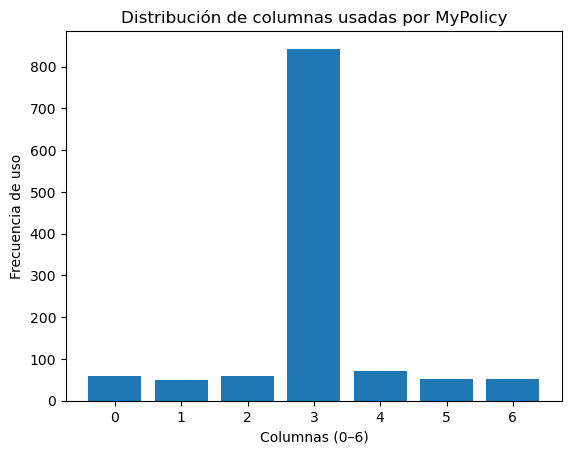

In [7]:
usage = column_usage(MyPolicy, games=200)

plt.bar(range(7), usage)
plt.xticks(range(7))
plt.xlabel("Columnas (0–6)")
plt.ylabel("Frecuencia de uso")
plt.title("Distribución de columnas usadas por MyPolicy")
plt.show()

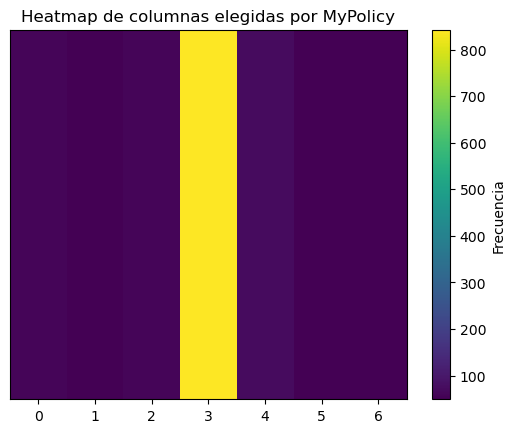

In [8]:
plt.imshow([usage], cmap="viridis", aspect="auto")
plt.colorbar(label="Frecuencia")
plt.xticks(range(7))
plt.yticks([])
plt.title("Heatmap de columnas elegidas por MyPolicy")
plt.show()


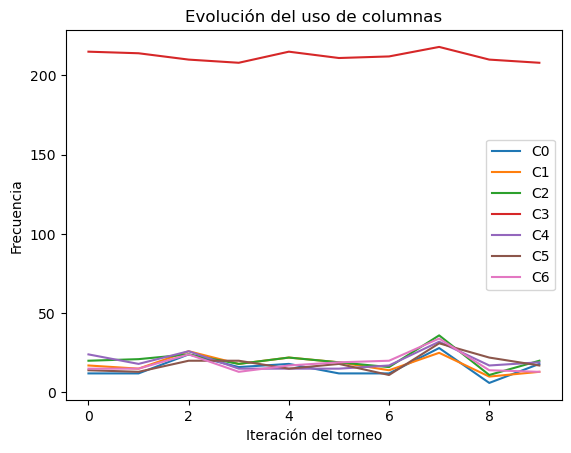

In [6]:
history = []
for i in range(10):     # 10 torneos de 50 juegos
    usage = column_usage(MyPolicy, games=50)
    history.append(usage)

history = np.array(history)
plt.plot(history)
plt.legend(["C0","C1","C2","C3","C4","C5","C6"])
plt.title("Evolución del uso de columnas")
plt.xlabel("Iteración del torneo")
plt.ylabel("Frecuencia")
plt.show()
